In [1]:
%run tools.ipynb

In [2]:
# 0.5 degree data
file_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/data/sacks2010/'
file_name = 'Maize.crop.calendar.fill.nc' # replace 'Maize' with Rice, Soybean, Wheat

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})

maize_harvest = ds['harvest']
ds_out = maize_harvest.to_dataset(name = 'maize_major')


In [3]:
# plot XY range
lon1 = -160
lon2 = 160
lat1 = -60
lat2 = 90

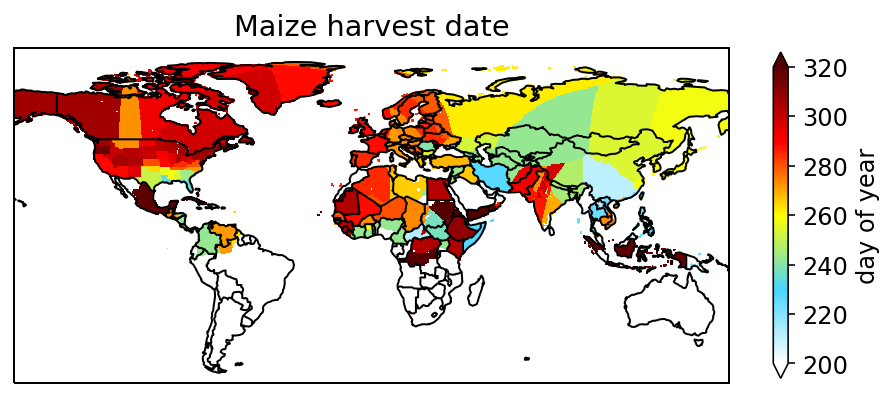

In [4]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=[8, 6])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
ax.coastlines()
ds['harvest'].plot(ax = ax,
                  transform=ccrs.PlateCarree(), 
                  cmap=WhGrYlRd, 
                  vmin = 200,
                  vmax = 320,
                  cbar_kwargs={'shrink': 0.5, 'label': 'day of year'})

ax.set_xlim(lon1,lon2)
ax.set_ylim(lat1,lat2)
ax.set_title('Maize harvest date')
ax.add_feature(cfeature.BORDERS)

out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop_China/figures/'
#fig.savefig(out_dir + 'harvest_date_China.png', dpi = 300, bbox_inches = "tight")


In [5]:
#
file_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/data/sacks2010/'

file_name = 'Maize.2.crop.calendar.fill.nc' # replace 'Maize' with Rice, Soybean, Wheat
ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
maize2_harvest = ds['harvest']
ds_out['maize_second'] = maize2_harvest.copy()

# Rice
file_name = 'Rice.crop.calendar.fill.nc' 

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
rice_harvest = ds['harvest']
ds_out['rice_major'] = rice_harvest.copy()

# Rice 2
file_name = 'Rice.2.crop.calendar.fill.nc' 

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
rice2_harvest = ds['harvest']
ds_out['rice_second'] = rice2_harvest.copy()

# Wheat spring
file_name = 'Wheat.crop.calendar.fill.nc' 

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
wheat_harvest = ds['harvest']
ds_out['wheat_spring'] = wheat_harvest.copy()

# Wheat winter
file_name = 'Wheat.Winter.crop.calendar.fill.nc' 

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
wheat2_harvest = ds['harvest']
ds_out['wheat_winter'] = wheat2_harvest.copy()

# Soybean
file_name = 'Soybeans.crop.calendar.fill.nc' 

ds = xr.open_dataset(file_dir + file_name)
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
soybean_harvest = ds['harvest']
ds_out['soybean'] = soybean_harvest.copy()


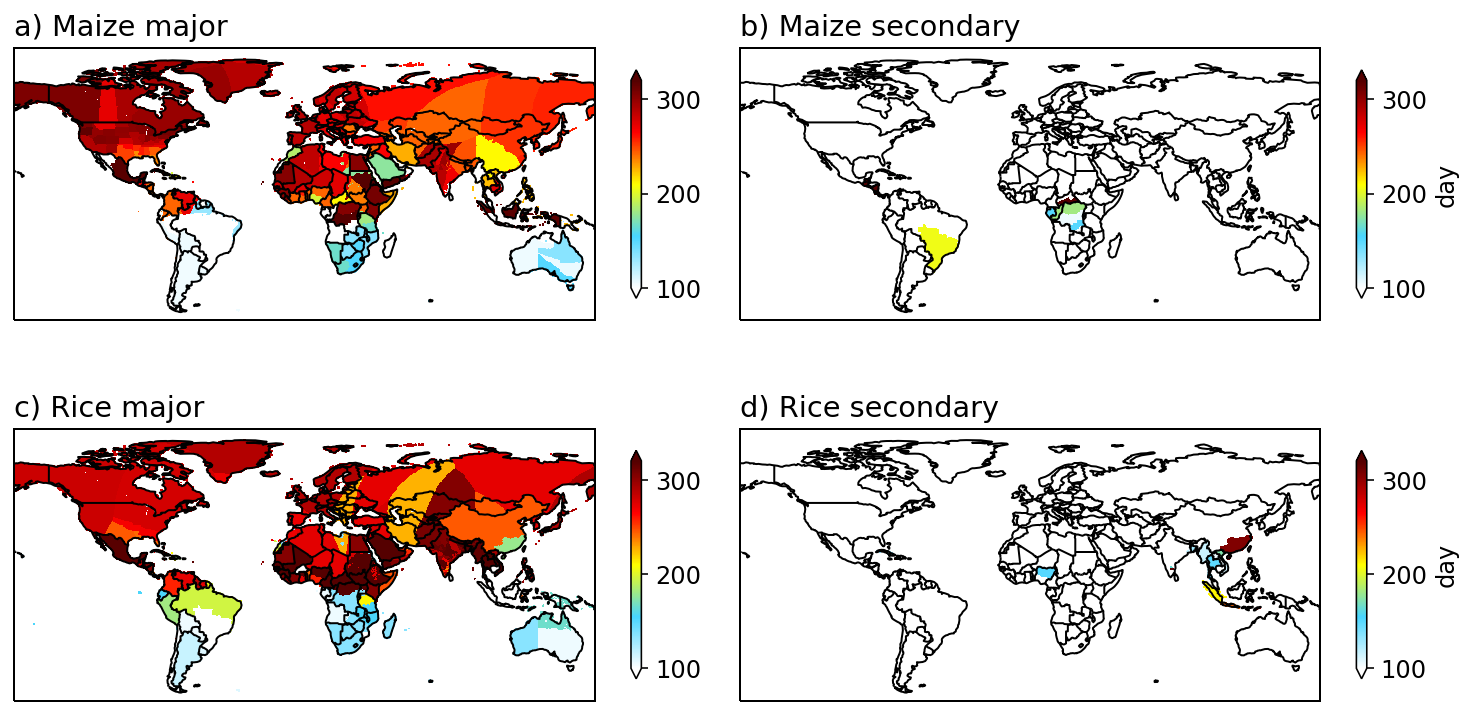

In [6]:
selected_crops = ['maize_major', 'maize_second', 'rice_major', 'rice_second', 'wheat_spring', 
                  'wheat_winter', 'soybean']

order_crops = ['a) Maize major', 'b) Maize secondary', 'c) Rice major', 'd) Rice secondary', 
          'e) Spring wheat', 'f) Winter wheat', 'g) Soybean']

lim_max = 320
lim_min = 100

shrink = 0.6

# figure 1, distribution
fig, axes = plt.subplots(2, 2, 
                             figsize=[13, 7], 
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             gridspec_kw={'hspace': 0, 'wspace': 0})
# before
maize_harvest.plot(ax=axes[0,0],
                  cmap=WhGrYlRd,
                  vmin = lim_min,
                  vmax = lim_max, 
                  add_labels = False,
                  cbar_kwargs={'shrink': shrink})
axes[0,0].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[0,0].set_title(order_crops[0], loc='left')
axes[0,0].coastlines()
#axes[0,0].gridlines(linestyle = '--')
axes[0,0].add_feature(cfeature.BORDERS)

# after
maize2_harvest.plot(ax=axes[0,1], 
                cmap=WhGrYlRd, 
                vmin = lim_min,
                vmax = lim_max, 
                cbar_kwargs={'shrink': shrink, 'label': 'day'})
axes[0,1].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[0,1].set_title(' ')
axes[0,1].set_title(order_crops[1], loc='left')
#axes[1].set_title('mean: ' + str(model_mean), loc = 'right')
axes[0,1].coastlines()
#axes[0,1].gridlines(linestyle = '--')
axes[0,1].add_feature(cfeature.BORDERS)

rice_harvest.plot(ax=axes[1,0],
                  cmap=WhGrYlRd,
                  vmin = lim_min,
                  vmax = lim_max,
                  add_labels = False,
                  cbar_kwargs={'shrink': shrink})
axes[1,0].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[1,0].set_title(order_crops[2], loc='left')
#axes[0].set_title('mean: ' + str(obs_mean), loc = 'right')
axes[1,0].coastlines()
#axes[1,0].gridlines(linestyle = '--')
axes[1,0].add_feature(cfeature.BORDERS)

# after
rice2_harvest.plot(ax=axes[1,1], 
                cmap=WhGrYlRd, 
                vmin = lim_min,
                vmax = lim_max, 
                cbar_kwargs={'shrink': shrink, 'label': 'day'})
axes[1,1].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[1,1].set_title(' ')
axes[1,1].set_title(order_crops[3], loc='left')
#axes[1].set_title('mean: ' + str(model_mean), loc = 'right')
axes[1,1].coastlines()
#axes[1,1].gridlines(linestyle = '--')
axes[1,1].add_feature(cfeature.BORDERS)

# save figure
out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/outputs/figures/global/'
fig.savefig(out_dir + 'harvest_date_global_4crops.png', dpi = 300, bbox_inches = "tight")


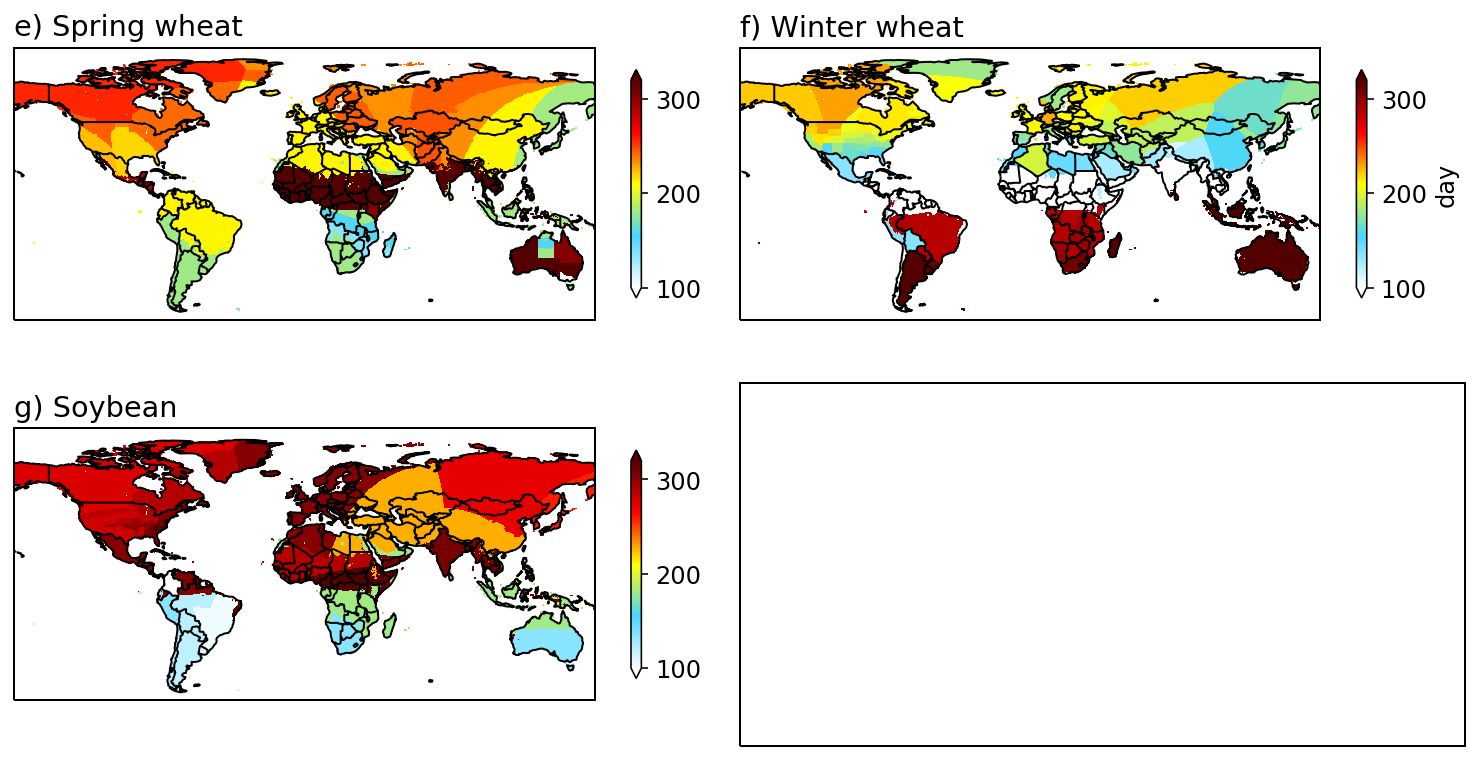

In [7]:

# figure 1, distribution
fig, axes = plt.subplots(2, 2, 
                             figsize=[13, 7], 
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             gridspec_kw={'hspace': 0, 'wspace': 0})
# before
wheat_harvest.plot(ax=axes[0,0],
                  cmap=WhGrYlRd,
                  vmin = lim_min,
                  vmax = lim_max, 
                  add_labels = False,
                  cbar_kwargs={'shrink': shrink})
axes[0,0].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[0,0].set_title(order_crops[4], loc='left')
axes[0,0].coastlines()
#axes[0,0].gridlines(linestyle = '--')
axes[0,0].add_feature(cfeature.BORDERS)

# after
wheat2_harvest.plot(ax=axes[0,1], 
                cmap=WhGrYlRd, 
                vmin = lim_min,
                vmax = lim_max, 
                cbar_kwargs={'shrink': shrink, 'label': 'day'})
axes[0,1].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[0,1].set_title(' ')
axes[0,1].set_title(order_crops[5], loc='left')
#axes[1].set_title('mean: ' + str(model_mean), loc = 'right')
axes[0,1].coastlines()
#axes[0,1].gridlines(linestyle = '--')
axes[0,1].add_feature(cfeature.BORDERS)

soybean_harvest.plot(ax=axes[1,0],
                  cmap=WhGrYlRd,
                  vmin = lim_min,
                  vmax = lim_max,
                  add_labels = False,
                  cbar_kwargs={'shrink': shrink})
axes[1,0].set_extent((lon1, lon2, lat1, lat2), ccrs.PlateCarree())
axes[1,0].set_title(order_crops[6], loc='left')
#axes[0].set_title('mean: ' + str(obs_mean), loc = 'right')
axes[1,0].coastlines()
#axes[1,0].gridlines(linestyle = '--')
axes[1,0].add_feature(cfeature.BORDERS)

# save figure
out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/outputs/figures/global/'
fig.savefig(out_dir + 'harvest_date_global_3crops.png', dpi = 300, bbox_inches = "tight")


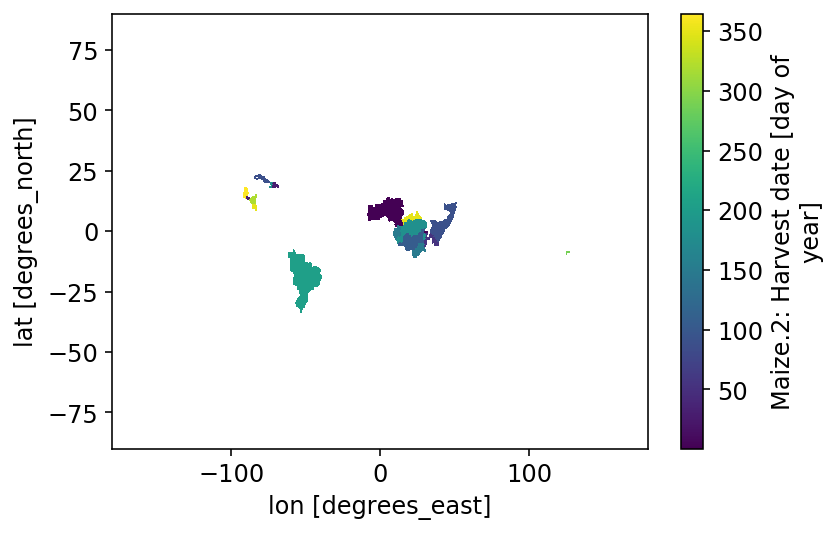

In [8]:
ds_out['maize_second'].plot()

In [9]:
ds_out.to_netcdf('../data/crop/crop_calendar.nc')

In [10]:
# regrid an xarray dataarray from finer resolution to coarser resolution (res)
# dr is the dataarray
def regrid_fine_to_coarse_mean_dr(dr, target, res_lat, res_lon):
    target_copy = target.copy()
    for ilon, lon in enumerate(target['lon'].values):
        for ilat, lat in enumerate(target['lat'].values):
            subset = dr.sel(lat=slice(lat-res_lat/2,lat+res_lat/2), lon = slice(lon-res_lon/2,lon+res_lon/2))
            #print(np.shape(subset))
            #print(lat, lon, subset)
            target_copy[ilat,ilon] = subset.mean().values
    
    return target_copy


In [11]:
# target array to interpolate to
fname = '../data/ozone/moch/GCHP.Health_hr.5Yavg_SpeciesConc_O3_2x25.nc4'
ds_tmp = xr.open_dataset(fname)

# target data array
dr_target = xr.DataArray(
            data=np.nan,
            dims=["lat", "lon"],
            coords=dict(
            lon=ds_tmp.lon,
            lat=ds_tmp.lat
    ))
# target dataset
ds_out_regrid = dr_target.to_dataset(name = selected_crops[0])

for i in range(1, len(selected_crops)): ds_out_regrid[selected_crops[i]] = dr_target.copy()


In [12]:
#ds_out['soybean']#.plot()

#da = ds_out['maize_major']
#da_flip = da.reindex(lat=list(reversed(da.lat)))

#out_regrid = regrid_fine_to_coarse_mean_dr(da_flip, dr_target, 2., 2.5)
#out_regrid.plot()

In [13]:
for i in range(len(selected_crops)):
    da = ds_out[selected_crops[i]].copy()
    da_flip = da.reindex(lat=list(reversed(da.lat)))
    ds_out_regrid[selected_crops[i]] = regrid_fine_to_coarse_mean_dr(da_flip, dr_target, 2., 2.5)
    

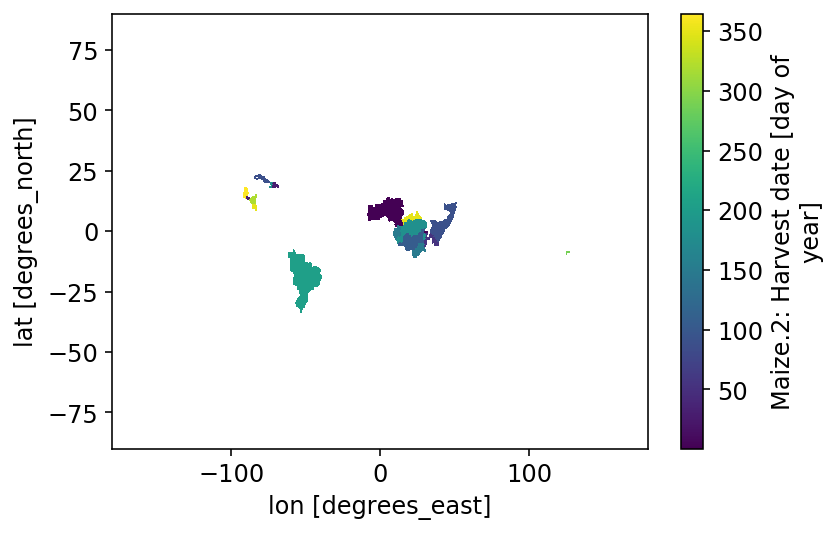

In [14]:
ds_out['maize_second'].plot()

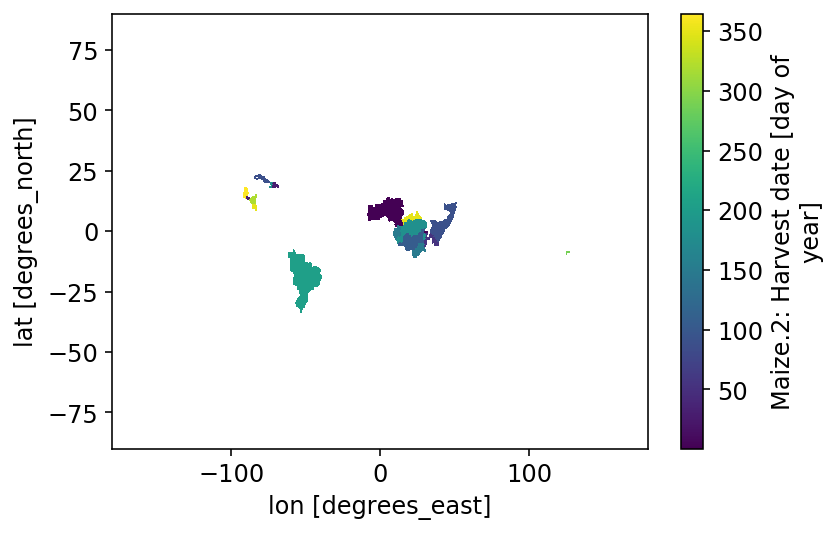

In [15]:
maize2_harvest.plot()

In [16]:
ds_out_regrid.to_netcdf('../data/crop/crop_calendar_2x2.5.nc')